# Real Estate Project


## Importing libraries and pulling data through api

In [1]:
#different libraries used to import data
from pathlib import Path
import plotly.express as px
import hvplot.pandas
import requests
import pandas as pd


In [22]:
#importing tax lien
data_1=pd.read_excel(Path('c:/users/jrram/Desktop/delinquent_taxes_1.xlsx'),skiprows=1)
data_1.head()

,DBA/Business Name,Owner Name,Location Address,County,Warrant Number,Warrant Amount Recorded in the County Records
0,HECKARD'S DOOR,WILLISTON DOOR LLC,"25340 NW 8TH LN STE 124, NEWBERRY, FL 32669",ALACHUA,1000000827314,6104.87
1,HECKARD'S DOOR,WILLISTON DOOR LLC,"25340 NW 8TH LN STE 124, NEWBERRY, FL 32669",ALACHUA,1000000852766,11353.45
2,GOLD ROOM,R.A.S. GAINESVILLE ENTERPRISES LLC,"11 SW 1ST ST, GAINESVILLE, FL 32601",ALACHUA,1000000783486,2445.80
3,GOLD ROOM,R.A.S. GAINESVILLE ENTERPRISES LLC,"11 SW 1ST ST, GAINESVILLE, FL 32601",ALACHUA,1000000787478,2364.45
4,GOLD ROOM,R.A.S. GAINESVILLE ENTERPRISES LLC,"11 SW 1ST ST, GAINESVILLE, FL 32601",ALACHUA,1000000798769,1596.77


In [120]:
#most amount owed in Average taxes

fl_df=data_1[['County', 'Warrant Amount Recorded in the County Records',]].groupby('County').mean().sort_values(by='Warrant Amount Recorded in the County Records', ascending=False).head(20)
fl_df.head()

,Warrant Amount Recorded in the County Records
County,
POLK,266168.250000
SAINT LUCIE,162820.350000
OSCEOLA,159610.880000
ST LUCIE,137559.972500
BREVARD,119927.986667


In [122]:
round(fl_df,0).hvplot.bar(rot=45, color='red',title= '15 Counties with Most Defaults on Property Tax')

:Bars   [County]   (Warrant Amount Recorded in the County Records)

In [25]:
#setting mapbox
px.set_mapbox_access_token('pk.eyJ1IjoianJyYW1lYXUyMDAwIiwiYSI6ImNrbXpseHZ2azBmYWwydm1vMm02eDhrNXkifQ.a1R4gzAG_sJgb3yLDBhW4g')


In [67]:
#importing county coordinates
county_coordinates = pd.read_excel(Path('c:/users/jrram/Desktop/location.xlsx'))
county_coordinates.head()

,COUNTY,Latitude,Longitude
0,POLK,27.8617,-81.6912
1,OSCEOLA,28.1020,-81.0755
2,ST LUCIE,27.3226,-80.5438
3,BREVARD,28.2639,-807214.0000
4,SANTA ROSA,30.7690,-86.9824


In [27]:
#reset index so County could become column
new_fl_data=fl_df.reset_index()

In [28]:
#RENAME COLUMN TO MAKE EASIER
column = ['COUNTY','WARRANT AMOUNT']
new_fl_data.columns=column
new_fl_data.head()

,COUNTY,WARRANT AMOUNT
0,POLK,266168.250000
1,SAINT LUCIE,162820.350000
2,OSCEOLA,159610.880000
3,ST LUCIE,137559.972500
4,BREVARD,119927.986667


In [68]:
#merged data to include warrant and coordinates together
warrant=pd.merge(new_fl_data,county_coordinates)
warrant.head()

,COUNTY,WARRANT AMOUNT,Latitude,Longitude
0,POLK,266168.250000,27.8617,-81.6912
1,OSCEOLA,159610.880000,28.1020,-81.0755
2,OSCEOLA,159610.880000,28.1020,-81.0755
3,ST LUCIE,137559.972500,27.3226,-80.5438
4,BREVARD,119927.986667,28.2639,-807214.0000


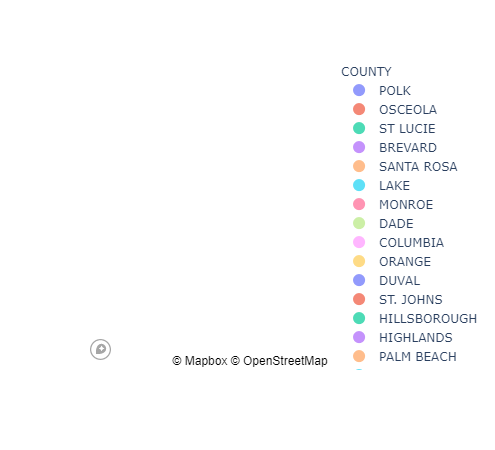

In [69]:
#displaying map
map_1=px.scatter_mapbox(
warrant,
lat= 'Latitude',
lon='Longitude',
color='COUNTY',
size='WARRANT AMOUNT')
#hover_name='County')
#title='Average Sale Price Per Square Foot and Gross Rent in San Francisco')
map_1

In [31]:
#importing miami airbnb data
miami_rental=pd.read_csv(Path('c:/users/jrram/Desktop/airbnb.csv'))
miami_rental.head()

,Property Type,Yearly Occupancy,nightly rate,Monthly Rental Income,Listing_ID
0,"'House',","34,","321,","3317,","10000216',"
1,"Apartment',","43,","81,","1077,","10387018',"
2,"House',","49,","168,","2503,","1048614',"
3,"Apartment',","56,","93,","1573,","10730815',"
4,"Loft',","78,","312,","7410,","11014976',"


In [32]:
#Cleaning data
column_names=list(miami_rental.columns.to_list())
for column_name in column_names:
    miami_rental[column_name]=miami_rental[column_name].str.replace("'","")
    miami_rental[column_name]=miami_rental[column_name].str.replace(",","")
    miami_rental[column_name]=miami_rental[column_name].str.replace(" ","")
    
miami_rental



,Property Type,Yearly Occupancy,nightly rate,Monthly Rental Income,Listing_ID
0,House,34,321,3317,10000216
1,Apartment,43,81,1077,10387018
2,House,49,168,2503,1048614
3,Apartment,56,93,1573,10730815
4,Loft,78,312,7410,11014976
...,...,...,...,...,...
995,House,75,110,2493,7272204
996,Guesthouse,64,53,1042,7396280
997,Apartment,0,255,0,773911
998,Guesthouse,67,95,1924,775360


In [33]:
#transforming str into numeric to be able to find mean
miami_rental['Monthly Rental Income'] = pd.to_numeric(miami_rental['Monthly Rental Income'])

#setting value in columns to numeric
miami_rental['Yearly Occupancy'] = pd.to_numeric(miami_rental['Yearly Occupancy'])

#setting nightly rate to numeric
miami_rental['nightly rate'] = pd.to_numeric(miami_rental['nightly rate'])

miami_rental.head()

,Property Type,Yearly Occupancy,nightly rate,Monthly Rental Income,Listing_ID
0,House,34,321,3317,10000216
1,Apartment,43,81,1077,10387018
2,House,49,168,2503,1048614
3,Apartment,56,93,1573,10730815
4,Loft,78,312,7410,11014976


In [34]:
#checking data types of each column
miami_rental.dtypes

Property Type            object
Yearly Occupancy          int64
nightly rate              int64
Monthly Rental Income     int64
Listing_ID               object
dtype: object

In [81]:
#average of everything
miami_rental['Yearly Revenue']=miami_rental['Monthly Rental Income'] * 12#creates new column named revenue where revenue= MR * 12

revenue_by_property=round(miami_rental.groupby('Property Type').mean(),)# groups by property and finds average

#revenue_by_property['non-weighted Revenue']=revenue_by_property['Yearly Occupancy']*revenue_by_property['nightly rate'] #each apartment may be weighed different

miami_columns=['Yearly Occupancy', 'Nightly Rate', 'Monthly Rental Income','Yearly Revenue']
revenue_by_property.columns=miami_columns
revenue_by_property


,Yearly Occupancy,Nightly Rate,Monthly Rental Income,Yearly Revenue
Property Type,,,,
Apartment,54.0,177.0,2744.0,32930.0
Bungalow,63.0,244.0,4881.0,58569.0
Condominium,56.0,180.0,2651.0,31809.0
Cottage,70.0,118.0,2522.0,30261.0
Guesthouse,63.0,79.0,1506.0,18074.0
Guestsuite,59.0,62.0,1068.0,12813.0
House,55.0,370.0,5449.0,65393.0
Loft,47.0,152.0,1900.0,22800.0
Servicedapartment,37.0,250.0,3314.0,39768.0


In [82]:
revenue_by_property['Yearly Revenue'].hvplot.bar(rot=45, title='Miami Yearly Revenue Per Property Type',color='green')

:Bars   [Property Type]   (Yearly Revenue)

In [38]:
#importing orlando data
orlando_data= pd.read_csv(Path('c:/users/jrram/Desktop/orlando_airbnb.csv'))

In [39]:
#Cleaning data
column_names_orlando=list(orlando_data.columns.to_list())
for column_name in column_names_orlando:
    orlando_data[column_name]=orlando_data[column_name].str.replace("'","")
    orlando_data[column_name]=orlando_data[column_name].str.replace(",","")
    orlando_data[column_name]=orlando_data[column_name].str.replace(" ","")
    
orlando_data.head()



,Property Type,Listing IDs,Occupancy,Nightly Rate,Monthly Income
0,Apartment,10660163,86,58,1513
1,Apartment,1225005,52,88,1393
2,Apartment,13299876,53,136,2210
3,Apartment,13625502,85,57,1477
4,Apartment,14666499,36,80,860


In [83]:
#transforming str into numeric to be able to find mean
orlando_data['Monthly Income'] = pd.to_numeric(orlando_data['Monthly Income'])

#setting value in columns to numeric
orlando_data['Occupancy'] = pd.to_numeric(orlando_data['Occupancy'])

#setting nightly rate to numeric
orlando_data['Nightly Rate'] = pd.to_numeric(orlando_data['Nightly Rate'])

#creating column for yearly income
orlando_data['Yearly Revenue']=orlando_data['Monthly Income'] * 12

# groups by property and finds average
revenue_by_property_orlando=round(orlando_data.groupby('Property Type').mean(),)

#creating columns with same title to facilitate merge later on
orlando_columns=['Yearly Occupancy', 'Nightly Rate', 'Monthly Rental Income','Yearly Revenue']
revenue_by_property_orlando.columns=orlando_columns



revenue_by_property_orlando




,Yearly Occupancy,Nightly Rate,Monthly Rental Income,Yearly Revenue
Property Type,,,,
Apartment,48.0,99.0,1328.0,15930.0
Bungalow,63.0,106.0,2022.0,24260.0
Cabin,68.0,40.0,827.0,9924.0
Chalet,16.0,128.0,640.0,7680.0
Condominium,39.0,117.0,1148.0,13772.0
Cottage,64.0,86.0,1670.0,20034.0
Guesthouse,58.0,82.0,1314.0,15764.0
Guestsuite,55.0,62.0,960.0,11521.0
House,56.0,140.0,2234.0,26813.0


In [84]:
revenue_by_property_orlando['Yearly Revenue'].hvplot.bar(rot=45,color='green')

:Bars   [Property Type]   (Yearly Revenue)

In [42]:
tampa_rental=pd.read_csv((Path('c:/users/jrram/Desktop/tampa_airbnb.csv')))
tampa_rental.head()

,Property Type,Listing Ids,Occupancy,Nightly Rate,Monthly Rental Income
0,'Apartment','9653554',87,52,1376
1,"'Apartment',","'10811316',","93,","59,","1677,"
2,"'Apartment',","'11047853',","22,","134,","884,"
3,"'Apartment',","'11161764',","30,","103,","936,"
4,"'Apartment',","'12157281',","87,","50,","1321,"


In [43]:
#Cleaning data
column_names_tampa=list(tampa_rental.columns.to_list())
for column_name in column_names_tampa:
    tampa_rental[column_name]=tampa_rental[column_name].str.replace("'","")
    tampa_rental[column_name]=tampa_rental[column_name].str.replace(",","")
    tampa_rental[column_name]=tampa_rental[column_name].str.replace(" ","")
    
tampa_rental



,Property Type,Listing Ids,Occupancy,Nightly Rate,Monthly Rental Income
0,Apartment,9653554,87,52,1376
1,Apartment,10811316,93,59,1677
2,Apartment,11047853,22,134,884
3,Apartment,11161764,30,103,936
4,Apartment,12157281,87,50,1321
...,...,...,...,...,...
763,Villa,43148625,41,1118,13975
764,Villa,43676838,71,75,1625
765,Villa,44341318,70,111,2387
766,Villa,47788136,90,350,9625


In [85]:
#setting value in columns to numeric
tampa_rental['Occupancy'] = pd.to_numeric(tampa_rental['Occupancy'])
tampa_rental['Nightly Rate']=pd.to_numeric(tampa_rental['Nightly Rate'])
tampa_rental['Monthly Rental Income']=pd.to_numeric(tampa_rental['Monthly Rental Income'])

#creating column for yearly income
tampa_rental['Yearly Revenue']=tampa_rental['Monthly Rental Income'] * 12

revenue_by_property_tampa=round(tampa_rental.groupby('Property Type').mean(),)# groups by property and finds average

tampa_columns=['Yearly Occupancy', 'Nightly Rate', 'Monthly Rental Income','Yearly Revenue']
revenue_by_property_tampa.columns=tampa_columns

revenue_by_property_tampa





,Yearly Occupancy,Nightly Rate,Monthly Rental Income,Yearly Revenue
Property Type,,,,
Apartment,52.0,106.0,1594.0,19127.0
Bungalow,52.0,162.0,2412.0,28943.0
Condominium,48.0,121.0,1730.0,20757.0
Cottage,62.0,77.0,1498.0,17976.0
Guesthouse,57.0,77.0,1291.0,15497.0
Guestsuite,56.0,65.0,1034.0,12408.0
House,55.0,210.0,3273.0,39278.0
Loft,52.0,157.0,2124.0,25486.0
Other,0.0,85.0,0.0,0.0


In [86]:
revenue_by_property_tampa['Yearly Revenue'].hvplot.bar(rot=45,title='Tampa - Yearly Revenue by Property Type',color='green')

:Bars   [Property Type]   (Yearly Revenue)

In [87]:
#creating DF with apt infos from different cities
apartment=pd.DataFrame({'Miami Apt':revenue_by_property.iloc[0],
              'Orlando Apt':revenue_by_property_orlando.iloc[0],
              'Tampa Apt': revenue_by_property_tampa.iloc[0]})
apartment

,Miami Apt,Orlando Apt,Tampa Apt
Yearly Occupancy,54.0,48.0,52.0
Nightly Rate,177.0,99.0,106.0
Monthly Rental Income,2744.0,1328.0,1594.0
Yearly Revenue,32930.0,15930.0,19127.0


In [114]:
apartment_chart=apartment.loc['Yearly Revenue'].hvplot.bar(title='Average Yearly Revenue from Apts in 3 cities',color='green',rot=45)
apartment_chart

:Bars   [index]   (Yearly Revenue)

In [94]:
#creating DF with house infos from different cities
house=pd.DataFrame({'Miami House':revenue_by_property.iloc[6],
              'Orlando House':revenue_by_property_orlando.iloc[8],
              'Tampa House': revenue_by_property_tampa.iloc[6]})
house

,Miami House,Orlando House,Tampa House
Yearly Occupancy,55.0,56.0,55.0
Nightly Rate,370.0,140.0,210.0
Monthly Rental Income,5449.0,2234.0,3273.0
Yearly Revenue,65393.0,26813.0,39278.0


In [113]:
house_chart=house.loc['Yearly Revenue'].hvplot.bar(title='Average Yearly Revenue from Houses in 3 Cities',color='green',rot=45)
house_chart

:Bars   [index]   (Yearly Revenue)

In [96]:
villa=pd.DataFrame({'Miami Villa':revenue_by_property.iloc[11],
              'Orlando Villa':revenue_by_property_orlando.iloc[13],
              'Tampa Villa': revenue_by_property_tampa.iloc[12]})
villa

,Miami Villa,Orlando Villa,Tampa Villa
Yearly Occupancy,52.0,54.0,49.0
Nightly Rate,1362.0,105.0,390.0
Monthly Rental Income,19657.0,1732.0,4181.0
Yearly Revenue,235878.0,20790.0,50174.0


In [112]:
villa_chart=villa.loc['Yearly Revenue'].hvplot.bar(title='Average Yearly Revenue from Villas in 3 Cities',color='green',rot=45)
villa_chart

:Bars   [index]   (Yearly Revenue)

In [115]:
overall_chart=apartment_chart * house_chart * villa_chart
overall_chart

:Overlay
   .Bars.Yearly_Revenue.I   :Bars   [index]   (Yearly Revenue)
   .Bars.Yearly_Revenue.II  :Bars   [index]   (Yearly Revenue)
   .Bars.Yearly_Revenue.III :Bars   [index]   (Yearly Revenue)

In [125]:
#imported house listing data in different cities
house_prices = pd.read_excel(Path('c:/users/jrram/Desktop/longitude & Latitude real estate.xlsx'))
house_prices.head()

,Address,Latitude,Longitude,Location,City,State,Zip Code,Listing Price
0,1745 NW 56th St,25.826807,-80.225618,"25.8268071,-80.2256177",Miami,FL,33142.0,285000.0
1,2010 NW 86th St,25.852324,-80.230933,"25.8523237,-80.2309332",Miami,FL,33147.0,329900.0
2,5266 NW 24 AVE,25.823542,-80.236955,"25.823542,-80.236955",Miami,FL,33142.0,455000.0
3,5266 NW 24 AVE,25.823542,-80.236955,"25.823542,-80.236955",Miami,FL,33142.0,455000.0
4,5266 NW 24 AVE,25.823542,-80.236955,"25.823542,-80.236955",Miami,FL,33142.0,455000.0


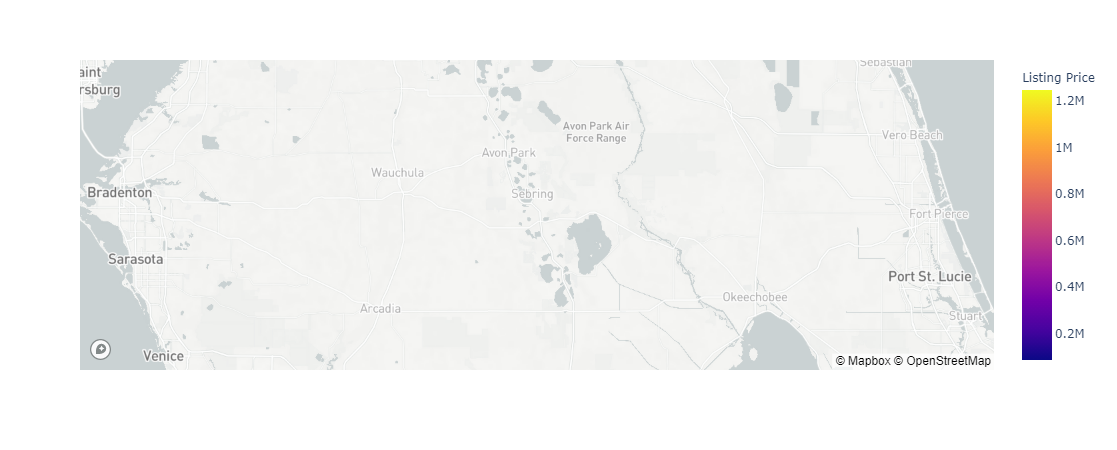

In [142]:
#mapping location of houses
map2=px.scatter_mapbox(
house_prices,
lat='Latitude',
lon='Longitude',
color='Listing Price',
text='Address'
)

map2